<a href="https://colab.research.google.com/github/AmirNBA9/MachineLearning/blob/master/Examin-Num01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ابتدا بايد ديتاست را بخوانيم

In [522]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/ML/modified-dataset.csv')

# تعداد رديف و ستون ها را بدست ميآوريم.
print(len(data))
print(len(data.columns))

395
26


In [523]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        388 non-null    object 
 1   sex           389 non-null    object 
 2   age           389 non-null    float64
 3   address       385 non-null    object 
 4   famsize       387 non-null    object 
 5   Pstatus       387 non-null    object 
 6   Medu          392 non-null    float64
 7   Fedu          387 non-null    float64
 8   Mjob          387 non-null    object 
 9   Fjob          387 non-null    object 
 10  guardian      383 non-null    object 
 11  traveltime    392 non-null    float64
 12  studytime     387 non-null    float64
 13  failures      387 non-null    float64
 14  Ssupport      388 non-null    object 
 15  Gsupport      390 non-null    object 
 16  feespaid      383 non-null    object 
 17  ecactivities  387 non-null    object 
 18  internet      386 non-null    

In [524]:
data.head(400)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,no,no,no,3.0,4.0,3.0,6.0,5.0,NaN,6.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,no,no,yes,3.0,3.0,3.0,4.0,5.0,5.0,6.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,yes,no,yes,3.0,2.0,3.0,10.0,7.0,8.0,10.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,yes,yes,yes,2.0,2.0,5.0,2.0,15.0,14.0,15.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,yes,no,no,NaN,2.0,5.0,4.0,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2.0,2.0,services,services,...,yes,no,no,5.0,4.0,4.0,11.0,9.0,9.0,9.0
391,MS,M,17.0,U,LE3,T,3.0,1.0,services,services,...,no,no,yes,4.0,5.0,2.0,3.0,14.0,16.0,16.0
392,MS,M,21.0,R,GT3,T,1.0,1.0,other,other,...,no,no,no,5.0,3.0,3.0,NaN,10.0,8.0,7.0
393,MS,M,18.0,R,LE3,T,3.0,2.0,services,other,...,no,no,yes,4.0,1.0,5.0,0.0,11.0,12.0,10.0


#توضيحات در خصوص ديتاست
 اين ديتاست شامل 395 سطر و 26 ستون است. كه از گوگل درايو خوانده ميشود.

 ## مقادير تهي
 باتوجه به وجود ديتا تهي، بنحوي بايد مشكل مقادير تهي را در اين ديتاست مرتفع نمود.
  طبق بررسي ها همه ستون ها مقادير تهي دارند.

In [525]:
# بررسي اينكه چه ستون هايي مقدار تهي دارند
# 1. يافتن ليستي از نام هاي ستون ها
list = []
for col in data.columns:
    list.append(col)
# 2. بررسي نام تعداد تهي در ستون ها
data[list].isnull().sum()

school           7
sex              6
age              6
address         10
famsize          8
Pstatus          8
Medu             3
Fedu             8
Mjob             8
Fjob             8
guardian        12
traveltime       3
studytime        8
failures         8
Ssupport         7
Gsupport         5
feespaid        12
ecactivities     8
internet         9
freetime         9
goout           12
health           8
absences         9
G1               5
G2              11
G3               7
dtype: int64

# Data cleansing
## پر كردن مقادير تهي
## تبديل كردن داده هاي متني به عددي

In [526]:
data['sex'] = data['sex'].replace(['F','M'],[0,1])
data['feespaid'] = data['feespaid'].replace(['no','yes'],[0,1])
data['ecactivities'] = data['ecactivities'].replace(['no','yes'],[0,1])
data['internet'] = data['internet'].replace(['no','yes'],[0,1])
data['school'] = data['school'].replace(['GP','MS'],[0,1])
data['famsize'] = data['famsize'].replace(['GT3','LE3'],[0,1])
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,0.0,0.0,18.0,U,0.0,A,4.0,4.0,at_home,teacher,...,0.0,0.0,0.0,3.0,4.0,3.0,6.0,5.0,NaN,6.0
1,0.0,0.0,17.0,U,0.0,T,1.0,1.0,at_home,other,...,0.0,0.0,1.0,3.0,3.0,3.0,4.0,5.0,5.0,6.0
2,0.0,0.0,15.0,U,1.0,T,1.0,1.0,at_home,other,...,1.0,0.0,1.0,3.0,2.0,3.0,10.0,7.0,8.0,10.0
3,0.0,0.0,15.0,U,0.0,T,4.0,2.0,health,services,...,1.0,1.0,1.0,2.0,2.0,5.0,2.0,15.0,14.0,15.0
4,0.0,0.0,16.0,U,0.0,T,3.0,3.0,other,other,...,1.0,0.0,0.0,NaN,2.0,5.0,4.0,6.0,10.0,10.0
5,0.0,1.0,16.0,U,1.0,T,4.0,NaN,services,other,...,1.0,1.0,NaN,4.0,2.0,5.0,10.0,15.0,15.0,15.0
6,0.0,1.0,16.0,U,1.0,T,2.0,2.0,other,other,...,0.0,0.0,1.0,4.0,4.0,3.0,0.0,12.0,12.0,11.0
7,0.0,0.0,17.0,U,0.0,A,4.0,4.0,other,teacher,...,0.0,0.0,0.0,1.0,4.0,1.0,NaN,6.0,5.0,6.0
8,0.0,1.0,15.0,U,1.0,A,3.0,2.0,services,other,...,1.0,0.0,1.0,2.0,2.0,1.0,0.0,16.0,NaN,19.0
9,0.0,1.0,15.0,U,0.0,T,3.0,4.0,other,other,...,1.0,1.0,1.0,5.0,1.0,5.0,0.0,14.0,15.0,15.0


In [527]:
data["Fedu"].fillna( method ='ffill', inplace = True)
data["Medu"].fillna( method ='ffill', inplace = True)
data["Fedu"].fillna( method ='ffill', inplace = True)
data["G1"].fillna( method ='ffill', inplace = True)
data["G3"].fillna( method ='ffill', inplace = True)
data["feespaid"].fillna( method ='ffill', inplace = True)
data["ecactivities"].fillna( method ='ffill', inplace = True)
data["freetime"].fillna( method ='ffill', inplace = True)
data["goout"].fillna( method ='ffill', inplace = True)
data["health"].fillna( method ='ffill', inplace = True)
data["sex"].fillna( method ='ffill', inplace = True)
data["age"].fillna( method ='ffill', inplace = True)
data["address"].fillna( method ='ffill', inplace = True)
data["famsize"].fillna( method ='ffill', inplace = True)
data["Pstatus"].fillna( method ='ffill', inplace = True)
data["guardian"].fillna( method ='ffill', inplace = True)
data["traveltime"].fillna( method ='ffill', inplace = True)
data["studytime"].fillna( method ='ffill', inplace = True)
data["failures"].fillna( method ='ffill', inplace = True)
data["Ssupport"].fillna( method ='ffill', inplace = True)
data["Gsupport"].fillna( method ='ffill', inplace = True)
data["absences"].fillna( method ='ffill', inplace = True)
data["Mjob"].fillna( method ='ffill', inplace = True)
data["Fjob"].fillna( method ='ffill', inplace = True)
data['school'].fillna( method ='ffill', inplace = True)
data.head(7)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,0.0,0.0,18.0,U,0.0,A,4.0,4.0,at_home,teacher,...,0.0,0.0,0.0,3.0,4.0,3.0,6.0,5.0,NaN,6.0
1,0.0,0.0,17.0,U,0.0,T,1.0,1.0,at_home,other,...,0.0,0.0,1.0,3.0,3.0,3.0,4.0,5.0,5.0,6.0
2,0.0,0.0,15.0,U,1.0,T,1.0,1.0,at_home,other,...,1.0,0.0,1.0,3.0,2.0,3.0,10.0,7.0,8.0,10.0
3,0.0,0.0,15.0,U,0.0,T,4.0,2.0,health,services,...,1.0,1.0,1.0,2.0,2.0,5.0,2.0,15.0,14.0,15.0
4,0.0,0.0,16.0,U,0.0,T,3.0,3.0,other,other,...,1.0,0.0,0.0,2.0,2.0,5.0,4.0,6.0,10.0,10.0
5,0.0,1.0,16.0,U,1.0,T,4.0,3.0,services,other,...,1.0,1.0,NaN,4.0,2.0,5.0,10.0,15.0,15.0,15.0
6,0.0,1.0,16.0,U,1.0,T,2.0,2.0,other,other,...,0.0,0.0,1.0,4.0,4.0,3.0,0.0,12.0,12.0,11.0


# پر کردن دیتا با استفاده از روش KNN

در این روش از دیتاهای نزدیک یا همسایه استفاده میشود. که در این تمرین فقط یک مورد را با این مدل پر میکنیم.

In [528]:
from sklearn.impute import KNNImputer as knn

imputer = knn(n_neighbors=2)
data['internet'] = imputer.fit_transform(data['internet'].values.reshape(-1, 1)) #knn fill


data.head(7)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,0.0,0.0,18.0,U,0.0,A,4.0,4.0,at_home,teacher,...,0.0,0.0,0.000000,3.0,4.0,3.0,6.0,5.0,NaN,6.0
1,0.0,0.0,17.0,U,0.0,T,1.0,1.0,at_home,other,...,0.0,0.0,1.000000,3.0,3.0,3.0,4.0,5.0,5.0,6.0
2,0.0,0.0,15.0,U,1.0,T,1.0,1.0,at_home,other,...,1.0,0.0,1.000000,3.0,2.0,3.0,10.0,7.0,8.0,10.0
3,0.0,0.0,15.0,U,0.0,T,4.0,2.0,health,services,...,1.0,1.0,1.000000,2.0,2.0,5.0,2.0,15.0,14.0,15.0
4,0.0,0.0,16.0,U,0.0,T,3.0,3.0,other,other,...,1.0,0.0,0.000000,2.0,2.0,5.0,4.0,6.0,10.0,10.0
5,0.0,1.0,16.0,U,1.0,T,4.0,3.0,services,other,...,1.0,1.0,0.829016,4.0,2.0,5.0,10.0,15.0,15.0,15.0
6,0.0,1.0,16.0,U,1.0,T,2.0,2.0,other,other,...,0.0,0.0,1.000000,4.0,4.0,3.0,0.0,12.0,12.0,11.0


# Median

In [529]:
data['G2'].fillna(data['G2'].median , inplace=True) # median

list = []
for col in data.columns:
    list.append(col)
# 2. بررسي نام تعداد تهي در ستون ها
data[list].isnull().sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
guardian        0
traveltime      0
studytime       0
failures        0
Ssupport        0
Gsupport        0
feespaid        0
ecactivities    0
internet        0
freetime        0
goout           0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64

# بررسی دیتا کلین شده

In [530]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        395 non-null    float64
 1   sex           395 non-null    float64
 2   age           395 non-null    float64
 3   address       395 non-null    object 
 4   famsize       395 non-null    float64
 5   Pstatus       395 non-null    object 
 6   Medu          395 non-null    float64
 7   Fedu          395 non-null    float64
 8   Mjob          395 non-null    object 
 9   Fjob          395 non-null    object 
 10  guardian      395 non-null    object 
 11  traveltime    395 non-null    float64
 12  studytime     395 non-null    float64
 13  failures      395 non-null    float64
 14  Ssupport      395 non-null    object 
 15  Gsupport      395 non-null    object 
 16  feespaid      395 non-null    float64
 17  ecactivities  395 non-null    float64
 18  internet      395 non-null    

تا اینجا همه دیتاهای تهی تعیین تکلیف شدند
به سراغ حل ميرويم

از مپ، مديان و ديكشنري هم ميتوان استفاده نمود.

#ترسيم توزيع ديتا

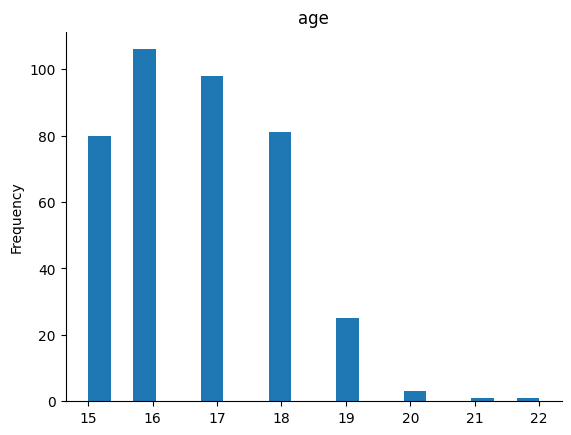

In [531]:
from matplotlib import pyplot as plt

data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

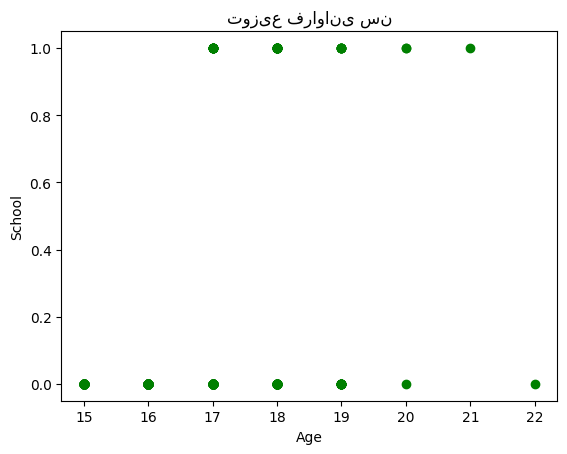

In [532]:
plt.scatter(data['age'], data['school'], color='green')
plt.title('توزیع فراوانی سن')
plt.ylabel('School') # 0=GP 1=MS
plt.xlabel('Age')
plt.show()

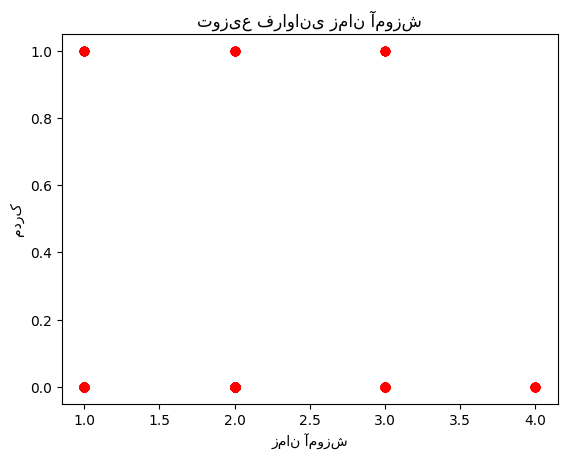

In [533]:
plt.scatter(data['studytime'], data['school'], color='red')
plt.title('توزیع فراوانی زمان آموزش')
plt.ylabel('مدرک') # 0=GP 1=MS
plt.xlabel('زمان آموزش')
plt.show()

#بررسي تعداد و انواع مدارس

In [534]:
unique_schools = data['famsize'].unique()
#print(unique_schools)

counts = data['famsize'].value_counts()
print(counts)

unique_schools = data['school'].unique()
#print(unique_schools)

counts = data['school'].value_counts()
print(counts)

0.0    279
1.0    116
Name: famsize, dtype: int64
0.0    349
1.0     46
Name: school, dtype: int64


# ساخت پلات

روش های محتلفی برای پلات کردن داریم، اما برای نمایش زیباتر و قابل فهم تر از هیستوگراف استفاده میکنیم. اما سایر موارد را کامنت کردم که وجود داشته باشد.

array([[<Axes: title={'center': 'G3'}>,
        <Axes: title={'center': 'famsize'}>],
       [<Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'studytime'}>]], dtype=object)

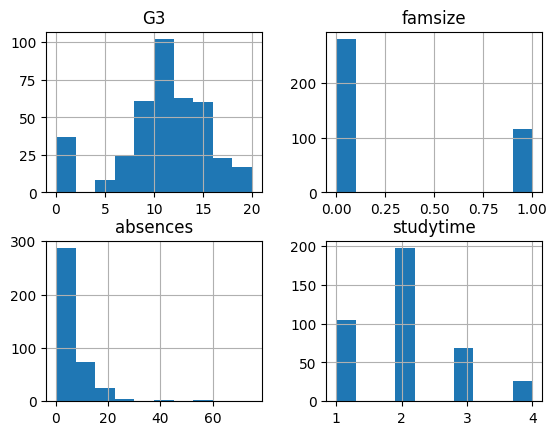

In [535]:
# df = pd.DataFrame(data, columns=["G3","famsize", "absences", "studytime"])

# # plot the dataframe
# df.plot(x="G3", y=["famsize","absences", "studytime"], kind="bar", figsize=(20, 5))

# # print bar graph
# plt.show()

# df = pd.DataFrame(data, columns=["G3","famsize", "absences", "studytime"])

# Plot the dataframe as a bar graph
# df.plot(x="G3", y=["famsize","absences", "studytime"], kind="bar", figsize=(20, 5))

# Show the bar graph
# plt.show()

# Plot histograms for each column separately
df.hist(column=["G3", "famsize", "absences", "studytime"])

# Show the histograms
# plt.show()

# با استفاده از الگوریتم Regression Linear یک مدل یادگیری ماشین را مرحله به مرحله طبق زیر آموزش دهید



In [536]:
from sklearn.model_selection import train_test_split

# بايد مقادير آرايه اي باشند
x = data['absences'].replace(['no','yes'],[0,1]).to_numpy().reshape(-1,1)
y= data['G3'].to_numpy().reshape(-1,1)

# چهار ورودي ميگيرد
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

print(x.shape)
print(y.shape)

(395, 1)
(395, 1)


## خواندن پارامتر ها
1. **fit_interceptbool, default=True**
  * Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).
2. **copy_Xbool, default=True**
  * If True, X will be copied; else, it may be overwritten.
3. **n_jobsint, default=None**
  * The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

4. **positivebool, default=False**
  * When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

In [537]:
#linear regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

score_reg = lr_model.score(x_test, y_test)
print(score_reg)

0.0005075265603412538


كشف دقت

In [538]:
from sklearn.metrics import mean_squared_error

# پیش‌بینی مقادیر
x_pred = lr_model.predict(x_test)
y_pred = lr_model.predict(y_test)

# محاسبه دقت
mlinear_msese = mean_squared_error(x_test, x_pred)
print(linear_mse)

3.14


In [539]:
lr_model.coef_

array([[0.00334696]])

In [540]:
lr_model.intercept_

array([10.43434962])

# نمایش خروجی

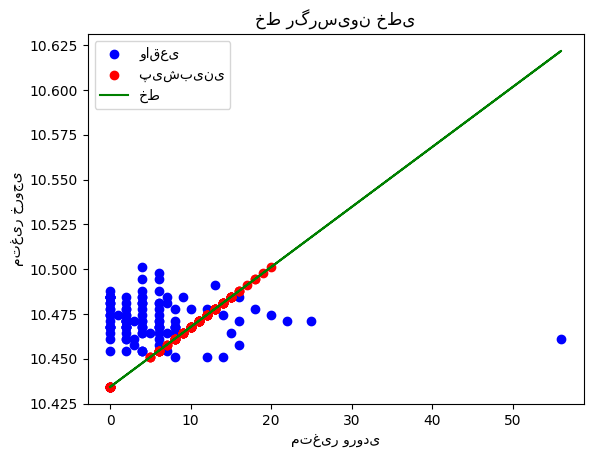

In [541]:
import matplotlib.pyplot as plt

# رسم نقاط واقعی
plt.scatter(x_test, y_pred, color='blue', label='واقعی')

# رسم نقاط پیش‌بینی شده
plt.scatter(y_test, y_pred, color='red', label='پیش‌بینی')

# رسم خط بر اساس معادله خطی
plt.plot(x_test, lr_model.coef_ * x_test + lr_model.intercept_, color='green', label='خط')

# تنظیمات نمودار
plt.xlabel('متغیر ورودی')
plt.ylabel('متغیر خروجی')
plt.title('خط رگرسیون خطی')
plt.legend()

# نمایش نمودار
plt.show()

# Ridge Regression

با استفاده از روش
Ridge Regression
می‌توانید یک مدل یادگیری ماشین ایجاد کنید. در
Ridge Regression
از یک تابع هدف با قید استفاده می‌شود که شامل مجموع مربعات ضرایب رگرسیون است. این قید، منجر به کاهش اندازه ضرایب رگرسیون می‌شود و از پدیده‌ی بیش‌برازش
(overfitting)
در مواجهه با داده‌های تست جلوگیری می‌کند.

برای استفاده از
Ridge Regression
در پایتون، ابتدا باید کلاس
Ridge
از کتابخانه
sklearn.linear_model
را استور نموده و یک نمونه از آن ایجاد کنید. سپس با استفاده از متد
fit مدل را بر روی داده‌های آموزش آموزش داده و بهینه‌سازی کنید.

کد زیر نشان می‌دهد چگونه از Ridge Regression برای بدست آوردن یک مدل استفاده کنید:

In [542]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)  # مقدار alpha به صورت دستی تعیین می‌شود
ridge_model.fit(x_train, y_train)


Ridge(alpha=0.5)

در این کد، مدل Ridge با یک مقدار alpha=0.5 ایجاد شده است. مقدار alpha نشان دهنده شدت محدودیت میزان تغییر ضرایب است. مقدار کمتر alpha به معنی افزایش آزادی مدل در تغییر ضرایب است.

تفاوت Ridge Regression با Linear Regression در این است که Ridge Regression از تابع هدفی با قید استفاده می‌کند که مجموع مربعات ضرایب را کمینه می‌کند، در حالی که Linear Regression فقط از مربعات خطا استفاده می‌کند. این قید در Ridge Regression به مدل کمک می‌کند که ضرایب را به مقدار کمتری برساند و از پدیده بیش‌برازش (overfitting) محافظت می‌کند. در حالی که در Linear Regression، قیدی وجود ندارد و به مدل امکان می‌دهد تا به طور کامل به داده‌های آموزش پاسخ دهد، حتی اگر این بدان معنی باشد که در داده‌های تست عملکرد آن ضعیف باشد.

پرسش‌ها:

آیا می‌توانید تفاوت بین جرم‌محدودیت (regularization term) و مربعات خطا (error term) در Ridge Regression را توضیح دهید؟
چه تاثیری مقدار alpha در عملکرد مدل Ridge Regression دارد؟
آیا می‌توانید تفاوت‌ها و مشابهات بین Ridge Regression و Lasso Regression را توضیح دهید؟

In [543]:
from sklearn.metrics import mean_squared_error, r2_score

# محاسبه میانگین مربعات خطا
ridge_mse = mean_squared_error(y_test, y_pred)

# محاسبه ضریب تعیین
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 21.317560550841144
R-squared: 0.0064043543318105245


# Lasso

با استفاده از روش Lasso Regression می‌توانید یک مدل یادگیری ماشین ایجاد کنید. در Lasso Regression، از یک تابع هدف با قید استفاده می‌شود که مجموع مقدار مطلق ضرایب رگرسیون را کمینه می‌کند. قید مربوطه، منجر به ایجاد فراهمی‌هایی برای تنظیم ضرایب رگرسیون است.

برای استفاده از Lasso Regression در پایتون، باید کلاس Lasso از کتابخانه sklearn.linear_model را استور نموده و یک نمونه از آن ایجاد کنید. سپس با استفاده از متد fit مدل را بر روی داده‌های آموزش آموزش داده و بهینه‌سازی کنید.

کد زیر نشان می‌دهد چگونه از Lasso Regression برای بدست آوردن یک مدل استفاده کنید:

In [544]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.5)  # مقدار alpha به صورت دستی تعیین می‌شود
lasso_model.fit(x_train, y_train)


Lasso(alpha=0.5)

در این کد، مدل Lasso با یک مقدار alpha=0.5 ایجاد شده است. مقدار alpha نشان دهنده شدت محدودیت میزان تغییر ضرایب است. مقدار کمتر alpha به معنی افزایش آزادی مدل در تغییر ضرایب است.

تفاوت Ridge Regression با Lasso Regression در این است که در Ridge Regression از مجموع مربعات ضرایب استفاده می‌شود، در حالی که در Lasso Regression از مجموع مقدار مطلق ضرایب استفاده می‌شود. این تفاوت موجب می‌شود که Lasso Regression دارای خاصیت انتخاب ویژگی (feature selection) باشد. به عبارت دیگر، Lasso Regression می‌تواند ضرایبی را به صفر رسانده و ویژگی‌های مهمتر را تشخیص دهد. این امکان در Ridge Regression وجود ندارد.

به طور کلی، Ridge Regression بیشتر برای کاهش بیش‌برازش (overfitting) و کاهش وزن ضرایب استفاده می‌شود، در حالی که Lasso Regression مناسب‌تر برای انتخاب ویژگی استفاده می‌شود.

In [545]:
from sklearn.metrics import mean_squared_error, r2_score

# پیش‌بینی خروجی با استفاده از مدل
y_pred = lasso_model.predict(x_test)

# محاسبه mean squared error
lasso_mse = mean_squared_error(y_test, y_pred)

# محاسبه ضریب تعیین
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", lasso_mse)
print("R-squared:", r2)


Mean Squared Error: 18.731247239921768
R-squared: -0.0001771488979043223


برای مقایسه دقت سه مدل Linear Regression، Lasso Regression و Ridge Regression، می‌توانید از نمودار میله ای (bar plot) استفاده کنید. در این نمودار، میزان دقت هر مدل را میانگین مربعات خطا (MSE) یا ضریب تعیین (R-squared) را روی محور عمودی نمایش دهید.

بعد از محاسبه مقدار MSE یا R-squared برای هر مدل با استفاده از داده‌های تست، می‌توانید این مقادیر را به یک لیست اضافه کنید و سپس این لیست را به تابع bar در کتابخانه matplotlib پاس دهید.

در ادامه کدی نمونه آورده شده است که نحوه ترسیم نمودار میله ای برای مقایسه دقت سه مدل را نشان می دهد:

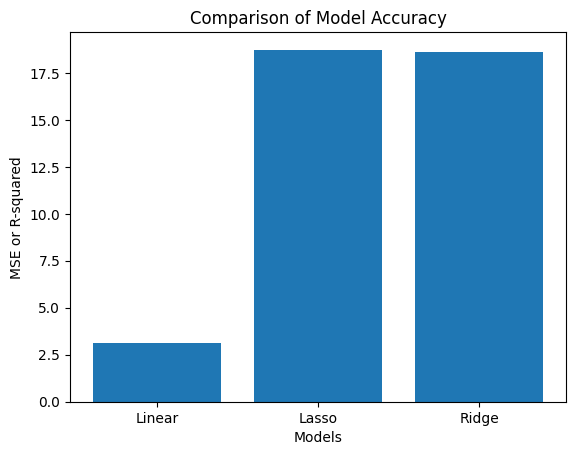

In [546]:
import matplotlib.pyplot as plt

# مقادیر MSE یا R-squared هر مدل

# لیست مقادیر MSE یا R-squared
values = [linear_mse, lasso_mse, ridge_mse]

# نام مدل‌ها
models = ['Linear', 'Lasso', 'Ridge']

# ترسیم نمودار میله ای
plt.bar(models, values)
plt.xlabel('Models')
plt.ylabel('MSE or R-squared')
plt.title('Comparison of Model Accuracy')
plt.show()


در این کد، ابتدا مقادیر MSE یا R-squared هر سه مدل را به صورت دستی تعیین می‌کنیم و در لیست values قرار می‌دهیم. همچنین نام مدل‌ها را در لیست models قرار می‌دهیم. سپس با استفاده از تابع bar در کتابخانه matplotlib، نمودار میله ای را ترسیم می‌کنیم. در نهایت محورها و عنوان نمودار تعیین می‌شوند و نمودار نشان داده می‌شود.